Theoretical part:
    
1. Hypothesis Testing

(a) P(mth experiment gives significant result | m experiments lacking power to reject H0)? <br>

The test's probability of making a type 1 error is $\alpha$ and increases when experiments are repeated.
The first m-1 experiments will have to return an insignificant result, which means they don't have the power to reject the null hypothesis. This would be $(1 - \alpha)$. The probability that the first m-1 experiments gives this result is thus $(1 - \alpha)^{m-1}$. The $m^{th}$ should be a type 1 error. The total probability is therefore $\alpha * (1 - \alpha)^{m-1}$

(b) P(at least one significant result | m experiments lacking power to reject H0)? <br>

Instead of looking at the probability of significant results, we can look at the complement of insignificant results, which leads to an easier computation. The probability that all of the experiments are insignificant is $(1 - \alpha)^m$. The probability that at least one is then significant is $1 - (1 - \alpha)^m$ <br>

(The family-wise error rate can then be used for the probability of making one or type 1 errors when performing multiple hypothesis tests. Many procedures to control the familywise error rate exist for this, one we could easily use is the Šidák procedure which tests the hypothesis using the formula $1 - (1 - \alpha)^\frac{1}{m}$. When the $p_i$ is lower or equal to this measure it rejects the null hypothesis.)

2. Bias and unfairness in Interleaving experiments

In a situation where we have two lists of documents: $l_1$ with documents $d_1$, $d_2$ and $d_3$ and $l_2$ with documents $d_2$, $d_3$ and $d_4$, both ranked in that order. When only document 3 is relevant, $l_2$ should win every time, since it has a higher ranking. However, with Team Draft interleaving, this does not happen, because the merging to the interleaved happens with coin flips and documents will be skipped when they have already been supplied by another list. When document 3 is the only relevant document, what happens in this situation is that after the skipping, both lists now have document 3 as their next document in the list, which means the coin flip doesn't matter and both lists will have the same relevance, as document 3 is the only relevant document, even though one of the lists is clearly better.

Experimental Part

Step 1

In [17]:
%matplotlib inline

import math
import pprint
import itertools
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

In [18]:
relevance = ['N', 'R', 'HR']

pairs = []

# All permutations of graded relevances of length 5
permutations = list(itertools.product(relevance, repeat=5))

# All possible pairs of P and E assuming they can give the same outcome
for perm in permutations:
    for perm_2 in permutations:
        pairs.append([perm, perm_2])
        
# Show 5000 random pairs uniformly selected
indices = np.random.randint(0, len(pairs), 5000)
sample_pairs = [pairs[i] for i in indices]
pp.pprint(sample_pairs)

[   [('R', 'HR', 'N', 'R', 'HR'), ('HR', 'R', 'R', 'R', 'HR')],
    [('N', 'N', 'R', 'R', 'N'), ('R', 'HR', 'HR', 'HR', 'R')],
    [('HR', 'R', 'R', 'HR', 'N'), ('HR', 'N', 'HR', 'HR', 'HR')],
    [('N', 'HR', 'HR', 'R', 'N'), ('R', 'N', 'N', 'R', 'N')],
    [('R', 'R', 'R', 'R', 'N'), ('R', 'HR', 'HR', 'N', 'HR')],
    [('R', 'N', 'R', 'R', 'N'), ('R', 'HR', 'N', 'HR', 'R')],
    [('N', 'N', 'N', 'N', 'HR'), ('HR', 'N', 'HR', 'R', 'N')],
    [('N', 'R', 'R', 'HR', 'N'), ('R', 'R', 'R', 'HR', 'R')],
    [('R', 'N', 'HR', 'R', 'R'), ('N', 'N', 'R', 'N', 'R')],
    [('HR', 'N', 'R', 'HR', 'HR'), ('HR', 'N', 'R', 'HR', 'R')],
    [('HR', 'HR', 'N', 'R', 'R'), ('N', 'R', 'HR', 'N', 'HR')],
    [('HR', 'N', 'R', 'HR', 'R'), ('N', 'N', 'R', 'R', 'HR')],
    [('R', 'R', 'N', 'R', 'HR'), ('R', 'HR', 'R', 'HR', 'N')],
    [('R', 'N', 'N', 'HR', 'R'), ('R', 'N', 'HR', 'R', 'R')],
    [('HR', 'N', 'HR', 'R', 'R'), ('N', 'HR', 'R', 'N', 'N')],
    [('R', 'HR', 'HR', 'HR', 'R'), ('N', 'R', 'N', 'R'

    [('HR', 'R', 'HR', 'R', 'N'), ('R', 'R', 'HR', 'R', 'HR')],
    [('R', 'R', 'HR', 'N', 'R'), ('R', 'N', 'N', 'HR', 'HR')],
    [('R', 'N', 'N', 'N', 'R'), ('N', 'R', 'HR', 'HR', 'R')],
    [('R', 'HR', 'R', 'N', 'HR'), ('HR', 'HR', 'N', 'N', 'R')],
    [('HR', 'HR', 'HR', 'R', 'R'), ('HR', 'HR', 'HR', 'N', 'N')],
    [('HR', 'R', 'R', 'N', 'N'), ('N', 'HR', 'HR', 'HR', 'R')],
    [('N', 'N', 'HR', 'N', 'R'), ('N', 'N', 'R', 'R', 'HR')],
    [('R', 'R', 'HR', 'R', 'N'), ('N', 'N', 'HR', 'N', 'R')],
    [('HR', 'HR', 'R', 'HR', 'R'), ('HR', 'R', 'N', 'HR', 'N')],
    [('R', 'R', 'N', 'HR', 'R'), ('R', 'R', 'HR', 'R', 'HR')],
    [('R', 'HR', 'R', 'N', 'R'), ('R', 'HR', 'N', 'N', 'R')],
    [('R', 'N', 'N', 'N', 'N'), ('R', 'N', 'N', 'R', 'R')],
    [('R', 'R', 'R', 'N', 'N'), ('N', 'HR', 'R', 'R', 'R')],
    [('N', 'R', 'R', 'N', 'N'), ('R', 'N', 'HR', 'N', 'HR')],
    [('N', 'N', 'HR', 'HR', 'R'), ('N', 'HR', 'N', 'HR', 'HR')],
    [('HR', 'R', 'N', 'R', 'N'), ('N', 'R', 'N', 'R', '

    [('R', 'HR', 'N', 'N', 'R'), ('HR', 'R', 'HR', 'N', 'R')],
    [('N', 'HR', 'R', 'HR', 'HR'), ('R', 'HR', 'HR', 'HR', 'N')],
    [('HR', 'R', 'R', 'R', 'HR'), ('HR', 'R', 'R', 'HR', 'R')],
    [('HR', 'R', 'R', 'HR', 'R'), ('N', 'R', 'N', 'HR', 'HR')],
    [('R', 'HR', 'HR', 'HR', 'HR'), ('N', 'N', 'HR', 'N', 'R')],
    [('HR', 'HR', 'N', 'R', 'HR'), ('R', 'R', 'HR', 'HR', 'R')],
    [('HR', 'HR', 'HR', 'N', 'HR'), ('N', 'N', 'HR', 'R', 'R')],
    [('HR', 'N', 'HR', 'N', 'HR'), ('N', 'HR', 'R', 'R', 'R')],
    [('R', 'N', 'HR', 'N', 'HR'), ('HR', 'N', 'N', 'N', 'N')],
    [('N', 'R', 'N', 'N', 'R'), ('N', 'R', 'N', 'N', 'N')],
    [('R', 'HR', 'N', 'N', 'HR'), ('HR', 'R', 'R', 'HR', 'N')],
    [('R', 'HR', 'N', 'R', 'N'), ('N', 'N', 'R', 'HR', 'HR')],
    [('HR', 'N', 'HR', 'R', 'N'), ('HR', 'HR', 'HR', 'R', 'R')],
    [('R', 'N', 'R', 'N', 'HR'), ('HR', 'N', 'HR', 'R', 'R')],
    [('R', 'N', 'R', 'N', 'HR'), ('HR', 'HR', 'N', 'N', 'HR')],
    [('N', 'HR', 'N', 'HR', 'HR'), ('R', '

Step 2

In [7]:
def precision_at_k(ranking_pair, k):
    precision = 0 
    if k > len(ranking_pair):
        k = len(ranking_pair)
    for i in range(k):
        if not ranking_pair[i] == 'N':
            precision += 1
            
    return precision / k

k = 10
precision_p = precision_at_k(pairs[1000][0], k) 
precision_e = precision_at_k(pairs[1000][1], k)
print(pairs[1000])
print(precision_p)
print(precision_e)
print(precision_e - precision_p)

[('N', 'N', 'N', 'R', 'R'), ('N', 'R', 'N', 'N', 'R')]
0.4
0.4
0.0


In [8]:
graded_relevance = {'N': 0, 'R': 1, 'HR': 2}

def nDCG_at_k(ranking_pair, k, highest_rel):
    nDCG = 0
    best_nDCG = 0
    if k > len(ranking_pair):
        k = len(ranking_pair)
    for i in range(1, k+1):
        rel = graded_relevance[ranking_pair[i-1]]
        nDCG += (2**rel - 1)/(math.log2(1 + i))
        
        # Assuming ideal is ["HR", "HR", "HR", "HR", "HR"]
        best_nDCG += (2**highest_rel - 1) / (math.log2(1 + i))
    return  nDCG / best_nDCG

nDCG_p = nDCG_at_k(pairs[1000][0], k, graded_relevance['HR'])
nDCG_e = nDCG_at_k(pairs[1000][1], k, graded_relevance['HR'])
print(pairs[1000])
print(nDCG_p)
print(nDCG_e)
print(nDCG_e - nDCG_p)

[('N', 'N', 'N', 'R', 'R'), ('N', 'R', 'N', 'N', 'R')]
0.09242447578501607
0.11506378074895644
0.02263930496394037


In [9]:
# Based on ERR paper
def relevance_probabilities(graded_relevance):
    rel_prob = {}
    max_value = max(list(graded_relevance.values()))
    for key, value in graded_relevance.items():
        rel_prob[key] = ((2**value) - 1) / (2**max_value)
    return rel_prob


def ERR(ranking_pair, rel_prob):
    sum_r = 0
    for r in range(1, len(ranking_pair) + 1):
        phi_r = rel_prob[ranking_pair[r-1]]
        if r != 1:
            prod_i = 1 
        else:
            prod_i = 0
        for i in range(1, r):
            phi_i = rel_prob[ranking_pair[i-1]]
            prod_i *= (1-phi_i) * phi_r
        sum_r += (1/r) * prod_i
    return sum_r
            

rel_prob = relevance_probabilities(graded_relevance)
print(pairs[1000])
ERR_p = ERR(pairs[1000][0], rel_prob)
print(ERR_p)
ERR_e = ERR(pairs[1000][1], rel_prob)
print(ERR_e)
print(ERR_e - ERR_p)


[('N', 'N', 'N', 'R', 'R'), ('N', 'R', 'N', 'N', 'R')]
0.0044921875
0.1255859375
0.12109375


Step 3

In [11]:
def balanced_interleaving(ranking1, ranking2):
    I = []
    origin = []
    k_a = 1
    k_b = 1
    # RandBit()
    priority = np.random.randint(0, 2)
    while(k_a <= len(ranking1) or k_b <= len(ranking2)):
        if((k_a < k_b) or ((k_a == k_b) and priority == 1)):
            # Assume ranking1 and ranking2 have different documents
            I.append(ranking1[k_a - 1])
            origin.append(0)
            k_a += 1
        else:
            I.append(ranking2[k_b - 1])
            origin.append(1)
            k_b += 1     
    return I, origin

# random doc ids
doc_pairs = [('doc1', 'doc2', 'doc3', 'doc4', 'doc5'), ('doc1', 'doc3', 'doc6', 'doc7', 'doc8')]
I = balanced_interleaving(doc_pairs[0], doc_pairs[1])
print(I)

(['doc1', 'doc1', 'doc3', 'doc2', 'doc6', 'doc3', 'doc7', 'doc4', 'doc8', 'doc5'], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0])


Step 4

In [12]:
def random_click_model(number_of_clicks, shown_docs):
    p = number_of_clicks / shown_docs
    clicked = []
    for i in range(shown_docs):
        clicked.append(np.random.choice([0, 1], p=[1-p, p]))
    return clicked

# 1 means document at index is clicked
clicked = random_click_model(2, 5)
print(pairs[100][0])
print(clicked)

('N', 'N', 'N', 'N', 'N')
[0, 0, 0, 0, 1]


In [13]:
def train_SDBN(sessions, urls_per_query, iterations):
    url_sessions = retrieve_url_sessions(sessions)
    
    old_gamma = init_gamma(urls_per_query)
    old_alpha = init_alpha(url_sessions, len(sessions))
    for i in range(iterations):
        alpha = E_step(url_sessions, sessions, old_gamma, old_alpha, urls_per_query)
        gamma = M_step(sessions, old_gamma, old_alpha, urls_per_query)
        old_alpha = alpha
        old_gamma = gamma
    return alpha, gamma

def init_gamma(urls_per_query):
    return [0] * urls_per_query

def init_alpha(url_sessions, dim):
    alpha = {}
    for url in url_sessions:
        alpha[url] = {}
        for session_index in url_sessions[url]:
            alpha[url][session_index] = 0
    return alpha
    
def E_step(url_sessions, sessions, gamma, alpha, urls_per_query):
    sum_alpha = init_alpha(url_sessions, len(sessions))
    for url in url_sessions:
        for session_index in url_sessions[url]:
            session = sessions[session_index]
            urls = session[0][5:]
            rank = urls.index(url)
            clicked = 0
            if len(session) > 1:
                for click in session[1:]:
                    if click[3] == url:
                        clicked = 1
            sum_alpha[url][session_index] += (1/len(url_sessions[url])) * (clicked + ((1 - clicked) * (((1 - gamma[rank]) * alpha[url][session_index]) / (1 - gamma[rank] * alpha[url][session_index]))))

    return sum_alpha

def M_step(sessions, gamma, alpha, urls_per_query):
    sum_gamma = [0] * urls_per_query
    for i, session in enumerate(sessions):
        session_index = session[0][0]
        query = session[0]
        urls = query[5:]
        clicked_urls = []
        if len(session) > 1:
            for click in session[1:]:
                clicked_urls.append(click[3])
        for rank, url in enumerate(urls):
            alpha_u = alpha
            if url in clicked_urls:
                clicked = 1
            else:
                clicked = 0      
            sum_gamma[rank] += clicked + ((1 - clicked) * ((1 - alpha[url][i]) * gamma[rank]) / (1 - gamma[rank] * alpha[url][i]))
    new_gamma = [old_gamma/len(sessions) for old_gamma in sum_gamma]
    return new_gamma

def retrieve_url_sessions(sessions):
    url_sessions = {}
    for i, session in enumerate(sessions):
        session_index = int(session[0][0])
        for url in session[0][5:]:
            if url in url_sessions:
                current_sessions = url_sessions[url]
                current_sessions.append(i)
                url_sessions[url] = current_sessions
            else:
                url_sessions[url] = [i]
    return url_sessions

# Store data per session
def read_click_log():
    with open('YandexRelPredChallenge.txt', 'r') as f:
        data = []
        i = -1
        while(i < 10000):
            row = f.readline().split()
            if row[2] == 'Q' or i == -1:
                i += 1
                data.append([])
                data[i].append(row)
            elif row[2] == 'C':
                data[i].append(row)
        return data

data = read_click_log()
_, gamma = train_SDBN(data, 10, 12)
print(gamma)

[0.998856917406084, 0.9242508986871214, 0.8300189491292622, 0.7441736409407242, 0.634208920239, 0.5564034161893961, 0.5234353387666686, 0.4843255048053378, 0.4429955243336911, 0.45686933066087704]


In [14]:
def simulate_interleaving(pair, number_of_clicks, gamma, alpha, N):
    wins_e_random = 0
    wins_e_pbm = 0 
    for _ in range(N):
        p = pair[0]
        e = pair[1]
        interleaved, origin = balanced_interleaving(p, e)
        clicked_random = random_click_model(number_of_clicks, len(interleaved))
        clicked_pbm = click_pbm(interleaved, gamma, alpha)
        score_random = assign_click_credit(origin, clicked_random)
        score_pbm = assign_click_credit(origin, clicked_pbm)
        # DRAWS ARE NOT WINS!!!
        if score_random[1] > score_random[0]:
            wins_e_random += 1
        if score_pbm[1] > score_pbm[0]:
            wins_e_pbm += 1     
    return wins_e_random, wins_e_pbm

def assign_click_credit(origin, clicked):
    score = [0, 0]
    for i, click in enumerate(clicked):
        if click == 1:
            score[origin[i]] += 1
    return score

def click_pbm(interleaved, gamma, alpha):
    clicked = []
    for rank, rel in enumerate(interleaved):
        prob_click = gamma[rank] * alpha[rel]
        clicked.append(np.random.choice([0, 1], p=[1-prob_click, prob_click]))
    return clicked

N = 100
alpha = relevance_probabilities(graded_relevance)
wins_random, wins_pbe = simulate_interleaving(pairs[50000], 2, gamma, alpha, N)
print("E won {0} times out of {1} simulations using random click model".format(wins_random, N))
print("E won {0} times out of {1} simulations using pbm model".format(wins_pbe, N))

E won 24 times out of 100 simulations using random click model
E won 40 times out of 100 simulations using pbm model


Step 7

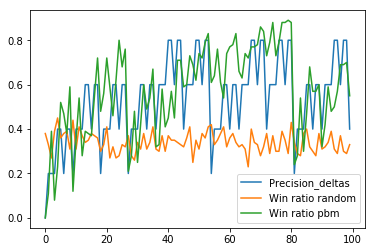

In [25]:
precision_deltas = []
win_ratio_randoms = []
win_ratio_pbms = []
errs = []
ndcgs = []

for pair in pairs[:100]:
    win_random, win_pbm = simulate_interleaving(pair, 2, gamma, alpha, N)
    precision_p = precision_at_k(pair[0], 10)
    precision_e = precision_at_k(pair[1], 10)
    #err = ERR(pair, rel_prob)
    #ndcg = nDCG_at_k(ranking_pair, k, highest_rel)
    precision_delta = precision_e - precision_p
    win_ratio_random = win_random / N
    win_ratio_pbm = win_pbm / N
    
    precision_deltas.append(precision_delta)
    #errs.append(err)
    #ndcgs.append(ndcgs)
    win_ratio_randoms.append(win_ratio_random)
    win_ratio_pbms.append(win_ratio_pbm)
    
plt.plot(precision_deltas, label='Precision_deltas')
plt.plot(win_ratio_randoms, label='Win ratio random')
plt.plot(win_ratio_pbms, label='Win ratio pbm')
#plt.plot(errs, label='ERR values')
#plt.plot(ndcgs, label='NDCG values')
#plt.ylabel('Probabilities')
plt.legend()
plt.show()